# Descriptive Statistics

In [4]:
import numpy as np
import pandas as pd
import scipy
import os
# set up the working directory
os.chdir('/Users/deborah_j/Documents/CEU/datacamp-playground/Introduction_to_Statistics_in_Python/')


In [5]:
# load the file and delete first column
amir_deals_df = pd.read_csv('amir_deals.csv')
del amir_deals_df['Unnamed: 0']
amir_deals_df

,product,client,status,amount,num_users
0,Product F,Current,Won,7389.52,19
1,Product C,New,Won,4493.01,43
2,Product B,New,Won,5738.09,87
3,Product I,Current,Won,2591.24,83
4,Product E,Current,Won,6622.97,17
...,...,...,...,...,...
173,Product A,Current,Lost,5835.32,23
174,Product D,Current,Won,6377.50,12
175,Product D,Current,Won,3537.61,28
176,Product A,Current,Won,6448.07,34


In [6]:
np.mean(amir_deals_df['amount'])

4812.000337078652

In [7]:
np.median(amir_deals_df['amount'])

4805.1900000000005

In [8]:
import statistics
statistics.mode(amir_deals_df['num_users'])

17

In [9]:
# by default, ascending is True
amir_deals_df['num_users'].sort_values()

85      1
29      1
123     1
151     2
91      2
       ..
63     94
120    96
133    98
107    99
40     99
Name: num_users, Length: 178, dtype: int64

In [10]:
# check roughly the distribution of the client column
amir_deals_df['client'].value_counts()

Current    145
New         33
Name: client, dtype: int64

In [11]:
# use aggregation function efficiently: dont forget [] within agg and no need for parentheses within agg
amir_deals_df.groupby('product')['amount'].agg([np.mean,np.median])


,mean,median
product,,
Product A,5228.240000,5597.340
Product B,4840.396452,4765.650
Product C,3386.596667,3579.630
Product D,5094.949000,4852.280
Product E,4894.302000,4823.990
Product F,4977.383636,5137.670
Product G,6671.095000,6671.095
Product H,4432.011250,4832.155
Product I,3915.044286,3220.450


<AxesSubplot:>

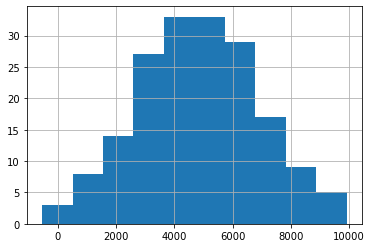

In [12]:
# visualize the distribution of the amount column: in jupyter notes book without plt.show() it still 
# shows the plot
import matplotlib.pyplot as plt
amir_deals_df['amount'].hist()

# clear the picture
# plt.clf()


In [13]:
# calculate the spread of the amount column
# without ddof=1, it calculates the population variance
print(np.var(amir_deals_df['amount'],ddof=1))
# standard deviation: two ways to calculate it
print(np.std(amir_deals_df['amount'],ddof=1))
print(amir_deals_df['amount'].std())

4236077.02557051
2058.17322535556
2058.17322535556


In [14]:
# mean absolute deviation.
# remember to import stats; importing scipy itself is not enough
from scipy import stats
stats.median_abs_deviation(amir_deals_df['amount'])
# Standard deviation vs. mean absolute deviation:
# Standard deviation squares distances, penalizing longer distances more than shorter ones. 
# Mean absolute deviation penalizes each distance equally.
# One isn't better than the other, but SD is more common than MAD.

1407.9649999999992

In [15]:
# Quantiles: cut points dividing the range of a prob distri into continuous intervals with equal probs
print(np.quantile(amir_deals_df['num_users'],0.3))
# Quartiles: 3 points dividing the range of a prob distri into 4 intervals with equal probs
# still use quantile function, but turn the current argument into a list
print(np.quantile(amir_deals_df['num_users'], [0,0.25,0.5,0.75,1]))
# linspace is also good with [start, stop, num], meaning (num-1) spaces between start and stop
print(np.quantile(amir_deals_df['num_users'], np.linspace(0,1,5)))

17.0
[ 1.   14.25 32.5  58.   99.  ]
[ 1.   14.25 32.5  58.   99.  ]


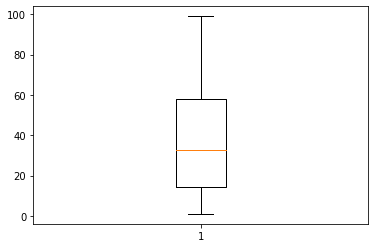

In [16]:
# try boxplot
plt.boxplot(amir_deals_df['num_users'])
plt.show()

In [17]:
# IQR: interquartile range, the height of the box in the box plot
# by definition, it is the difference between the 75th and 25th percentiles
print(np.quantile(amir_deals_df['num_users'],0.75) - np.quantile(amir_deals_df['num_users'],0.25))
# there is also a dedicated function for IQR
from scipy.stats import iqr
print(iqr(amir_deals_df['num_users']))
# IQR is a robust measure of spread, as it is not influenced by outliers; 
# and we can use IQR to find ourliers, e.g. Q1 - 1.5*IQR or Q3 + 1.5*IQR

43.75
43.75


In [18]:
# an example of finding outliers
lower_bound = np.quantile(amir_deals_df['amount'],0.25) - 1.5*iqr(amir_deals_df['amount'])
upper_bound = np.quantile(amir_deals_df['amount'],0.75) + 1.5*iqr(amir_deals_df['amount'])
amir_deals_df[(amir_deals_df['amount'] < lower_bound) | (amir_deals_df['amount'] > upper_bound)]
# no outliers in this case? good... good

,product,client,status,amount,num_users


In [19]:
# all in one go
amir_deals_df['amount'].describe()

count     178.000000
mean     4812.000337
std      2058.173225
min      -539.230000
25%      3415.927500
50%      4805.190000
75%      6217.257500
max      9913.270000
Name: amount, dtype: float64

# Sampling and Distributions

## 1. set a random seed and do sampling

In [ ]:

np.random.seed(10)
amir_deals_df.sample()

,product,client,status,amount,num_users
69,Product J,New,Lost,3182.09,2


In [22]:
# decide on the number of samples and if we want to replace them
amir_deals_df.sample(n=5, replace=True)

,product,client,status,amount,num_users
42,Product A,Current,Won,5827.35,50
162,Product D,Current,Won,6755.66,59
168,Product A,Current,Won,8448.77,8
46,Product B,Current,Won,8222.62,2
160,Product D,Current,Lost,6690.06,60


## 2.Uniform distritbion

In [ ]:
# Uniform distritbion: all outcomes are equally likely, (wait time <= 7, start, end)
from scipy.stats import uniform
uniform.cdf(7,0,13)

0.5384615384615384

In [28]:
# what about if we want wait time>7
1 - uniform.cdf(7, 0,13)

0.46153846153846156

In [30]:
# what about between 7 and 12 minutes
uniform.cdf(12, 0,13) - uniform.cdf(7,0,13)

0.3846153846153847

In [ ]:
# Generating random numbers according to uniform distribution
from scipy.stats import uniform
uniform.rvs(0,13,size =10) #rvs = random variates

array([ 7.36774902,  6.9351215 ,  0.19318032, 12.71269042,  7.44937575,
       10.29284095,  7.30024568, 11.40535814,  7.59454577,  9.21504774])

## 3. The binomial distribution

In [42]:
# generate a random number:(# of coins, probability of heads/success, size=# of trials)
from scipy.stats import binom
binom.rvs(2,0.5, size=3) 

array([1, 0, 2])

In [44]:
# what's probability of 7 heads in 10 coin flips? (num heads, num trials, prob of success)
binom.pmf(7,10,0.5)

0.11718750000000014

In [46]:
# what's the probability of 7 or fewer heads in 10 coin flips?
binom.cdf(7,10,0.5)

0.9453125

In [47]:
# and more than 7 heads?
1 - binom.cdf(7,10,0.5)

0.0546875

## 4. The normal distribution

In [48]:
# generating random numbers according to binomial distribution
from scipy.stats import norm
norm.rvs(161,7,size =10)

array([170.45668847, 164.31323981, 163.24417696, 168.58136598,
       164.76079689, 170.13288774, 159.83951113, 151.93787383,
       141.68973183, 176.85839323])

In [50]:
# what's the probability of a weight being less than 150g?
norm.cdf(150,161,7)

0.05804156686932752

In [ ]:
# what height are 90% of the weights below?
norm.ppf(0.9,161,7) #ppf = percent point function

169.9708609588122

In [52]:
# waht height are 90% of the weights above?
norm.ppf((1-0.9),161,7)

152.0291390411878

## 5. Simulate the central limit theorem

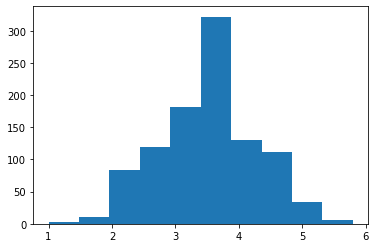

In [64]:
# make a dice
die = pd.Series([1,2,3,4,5,6])
# sample 5 times with replacement; take the mean of the sample; repeat 1000 times
sample_means = []
for i in range(1000):
    sample_means.append(np.mean(die.sample(5, replace= True)))

plt.hist(sample_means)
plt.show()


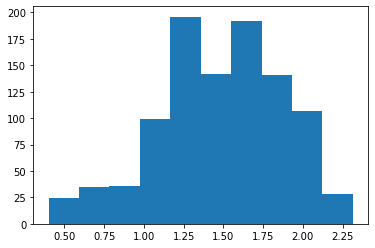

In [66]:
# Standard deviation and the CLT
sample_sds=[]
for i in range(1000):
    sample_sds.append(np.std(die.sample(5, replace=True)))

plt.hist(sample_sds)
plt.show()

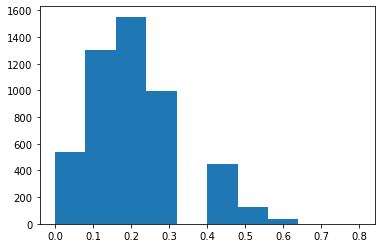

In [73]:
# Proportions and the CLT
sales_team = pd.Series(['Amir','Brian', 'Claire', 'Dan', 'Ed'])
Claire_sample_mean = []
for i in range(5000):
    Claire_sample_mean.append(np.mean(sales_team.sample(10, replace = True) == 'Claire'))
plt.hist(Claire_sample_mean)
plt.show()

## 6. The Poisson distribution
Events appear to happen at a certain rate, but completely at random.
Examples:
- Number of animals adopted from an animal shelter per week
- Number of people arriving at a restaurant per hour
- Number of earthquakes in California per year

λ = average number of events per time interval. Lambda is the distribution's peak


In [ ]:
# Sampling from a Poisson distribution; remember the CLT still applies!
from scipy.stats import poisson
poisson.rvs(8,size=10) # we want 10 values

array([5, 7, 8, 6, 9, 5, 9, 7, 9, 6])

In [ ]:
# Probability of a single value
# If the average number of adoptions per week is 8, what is P of (# adoptions in a week = 5)?
poisson.pmf(5,8)

0.09160366159257921

In [80]:
# If the average number of adoptions per week is 8, what is P (# adoptions in a week ≤ 5)?
poisson.cdf(5,8)

0.19123606207962532

## 7.Exponential distribution
Probability of time between Poisson events
Examples:
- Probability of > 1 day between adoptions
- Probability of < 10 minutes between restaurant arrivals 
- Probability of 6-8 months between earthquakes
Also uses lambda (rate); Continuous (time)

In [84]:
# How long until a new request is created? scale = 1/λ 
from scipy.stats import expon
expon.cdf(1, scale=2) #P(wait < 1 min)


0.3934693402873666

## 8. (Student's) t-distribution
Similar shape as the normal distribution;
Has parameter degrees of freedom (df) which affects the thickness of the tails
- Lower df = thicker tails, higher standard deviation 
- Higher df = closer to normal distribution